In [108]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import statsmodels.api as sm
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Ver las primeras filas de los datos


                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007        60000.0      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007       135000.0      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012       600000.0     100000  Diesel   
3    Datsun RediGO T Option  2017       250000.0      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014       450000.0     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


Resumen


               year  selling_price     km_driven
count  12468.000000   1.246800e+04  1.246800e+04
mean    2013.555743   5.915773e+05  6.856508e+04
std        4.118485   7.377876e+05  5.333721e+04
min     1983.000000   2.000000e+04  1.000000e+00
25%     2011.000000 

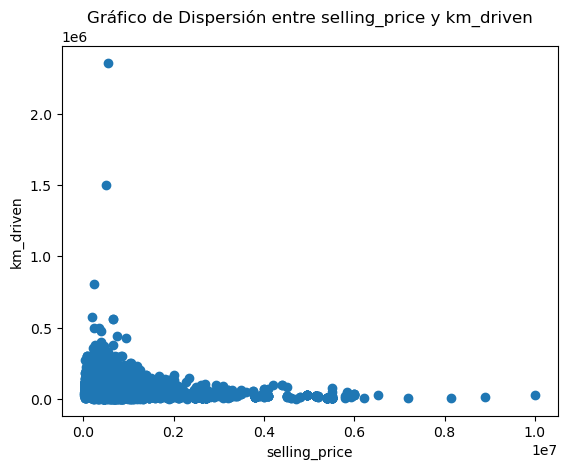

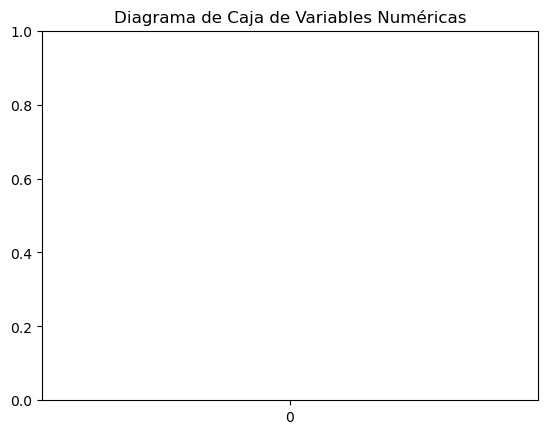

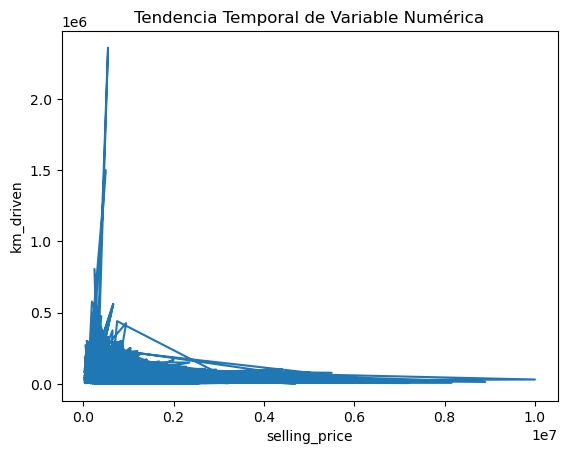

Valores Faltantes
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64


Error cuadrático medio: 382984783180.4456
Coeficiente de determinación (R^2): 0.16730354652223645


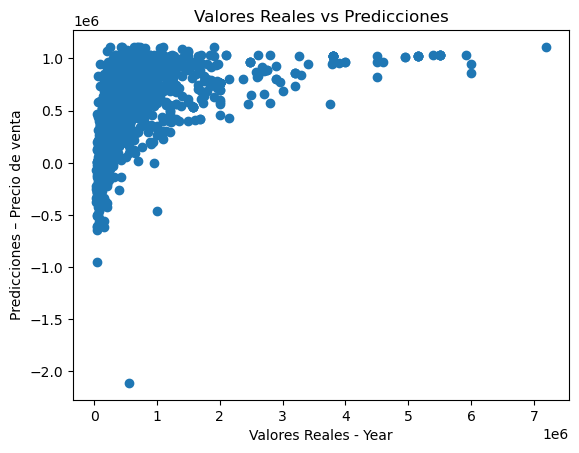

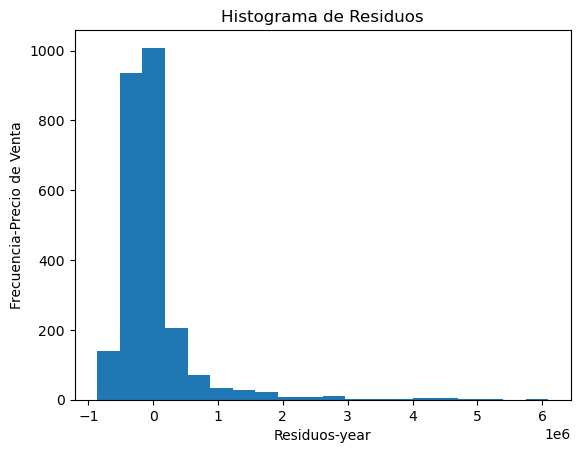

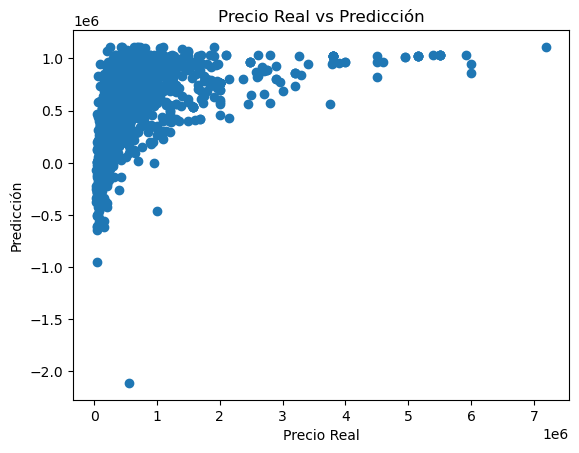

In [110]:
# Cargar archivos CSV
df2 = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df3 = pd.read_csv('Car details v3.csv')
df4 = pd.read_csv('car details v4.csv')

# Cambiar el nombre de algunas columna en cada DataFrame
df4 = df4.rename(columns={'Kilometer': 'km_driven'})
df4 = df4.rename(columns={'Fuel Type': 'fuel'})
df4 = df4.rename(columns={'Year': 'year'})
df4 = df4.rename(columns={'Seller Type': 'seller_type'})
df4 = df4.rename(columns={'Transmission': 'transmission'})
df4 = df4.rename(columns={'Owner': 'owner'})

# Unir las dos columnas y cambiar el nombre de la columna resultante en el DataFrame
df4 = df4.assign(nueva_columna=df4['Make'] + df4['Model'])

# Eliminar las columnas originales
df4 = df4.drop(columns=['Make', 'Model'])

# Cambiar el nombre de la columna resultante
df4 = df4.rename(columns={'name': 'name'})

# Concatena los DataFrames
df_concatenado = pd.concat([df2, df3, df4], ignore_index=True)

# Lista de columnas a eliminar
columnas_a_eliminar = ['nueva_columna','mileage', 'engine', 'max_power', 'torque', 'seats', 'Price', 'Location', 'Color', 
                       'Engine', 'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']

# Elimina las columnas específicas
df_concatenado = df_concatenado.drop(columns=columnas_a_eliminar)

#Eliminar columnas con valores faltantes
df_concatenado.dropna(inplace=True)

#DataFrame concatenado después de eliminar columnas:
print("Ver las primeras filas de los datos")
print("\n")
print(df_concatenado.head())
print("\n")

print("Resumen")
print("\n")
print(df_concatenado.describe())
print("\n")

print("Informacion")
print("\n")
print(df_concatenado.info())
print("\n")

# Gráficos de dispersión entre variables
plt.scatter(df_concatenado['selling_price'], df_concatenado['km_driven'])
plt.xlabel('selling_price')
plt.ylabel('km_driven')
plt.title('Gráfico de Dispersión entre selling_price y km_driven')
plt.show()

# Diagrama de caja para detectar valores atípicos
sns.boxplot(df_concatenado='selling_price')
plt.title('Diagrama de Caja de Variables Numéricas')
plt.show()

# Gráfico de línea para visualizar tendencia temporal
plt.plot(df_concatenado['selling_price'], df_concatenado['km_driven'])
plt.title('Tendencia Temporal de Variable Numérica')
plt.xlabel('selling_price')
plt.ylabel('km_driven')
plt.show()

# Identificar valores faltantes
missing_values = df_concatenado.isnull().sum()
print("Valores Faltantes")
print(missing_values)

# Eliminar filas con valores faltantes
data_clean = df_concatenado.dropna()

# Selecciona las características independientes
X = df_concatenado[['year', 'km_driven']]  
# Selecciona la variable objetivo
y = df_concatenado['selling_price']  

#Dividir el dataset en Train y Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Entrenar el modelo de regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)

#Realizar predicciones
y_pred = model.predict(X_test)

# Calcula el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Calcula el coeficiente de determinación (R^2)
r2 = r2_score(y_test, y_pred)

print("\n")
print('Error cuadrático medio:', mse)
print('Coeficiente de determinación (R^2):', r2)

#Diagrama de dispercion
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reales - Year")
plt.ylabel("Predicciones – Precio de venta")
plt.title("Valores Reales vs Predicciones")
plt.show()

#Histograma
residuos = y_test - y_pred
plt.hist(residuos, bins=20)
plt.xlabel("Residuos-year")
plt.ylabel("Frecuencia-Precio de Venta")
plt.title("Histograma de Residuos")
plt.show()

#Grafico de regresion Lineal
plt.scatter(y_test, y_pred)
plt.xlabel("Precio Real")
plt.ylabel("Predicción")
plt.title("Precio Real vs Predicción")
plt.show()



